# <center> **Home Credit Default Risk Assessment**
# <center> **Machine Learning Iterations**

# **Introduction**

In this part of the project, I utilized LightGBM's feature importance tool to identify the features with the most predictive power. With this tool, I identified 18 features with acceptable predictive values.

# **Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from sklearn.metrics import roc_auc_score

from feature_engine.encoding import WoEEncoder
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import ArbitraryNumberImputer

import functions
import importlib
importlib.reload(functions)

import warnings

# **Display**

In [2]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_rows', 200)

# **Load Data**

In [3]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\Data\train 22.csv",
    index_col=False
)

## **Reduce Memory Usage**

In [4]:
train = functions.reduce_memory_usage(train)

Memory usage of dataframe is 293.26 MB
Memory usage after optimization is: 99.71 MB
Decreased by 66.0%


## **Variables**

In [5]:
random_state = 101
target = 'TARGET'

## **Imputation**

In [6]:
ani = ArbitraryNumberImputer(arbitrary_number=-99999)
ani.fit(train)
train = ani.transform(train)

In [7]:
ci = CategoricalImputer(imputation_method='missing', fill_value='UNKNOWN')
ci.fit(train)
train = ci.transform(train)

## **WoE Encoder**

In [8]:
woe = WoEEncoder(fill_value=0.0001)
woe.fit(train, train[target])
train_encoded = woe.transform(train)

## **Train Test Split**

In [9]:
X = train_encoded.drop('TARGET', axis=1)
y = train_encoded['TARGET']

X, y = shuffle(X, y, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

### **LGBM**

Training the dataset using LGBM on all the featuers.

In [10]:
model = lgb.LGBMClassifier(boosting_type='gbdt', 
                           num_leaves=31, 
                           max_depth=-1, 
                           learning_rate=0.1, 
                           n_estimators=100,
                           verbose=-1)

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]  

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.76


## **Feature Importance**

Identifying which features have the most prdictive value.

In [23]:
feature_importance = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

importance_df

,Feature,Importance
0,ANNUITY_TO_CREDIT_RATIO,206
1,EXT_SOURCE_MEAN,160
2,ANNUAL_PAYMENT_TO_CREDIT_RATIO,140
3,AGE,139
4,EXT_SOURCE_3,128
5,YEARS_ID_PUBLISH,114
6,AMT_ANNUITY,97
7,AMT_GOODS_PRICE,87
8,EXT_SOURCE_2,82
9,EXT_SOURCE_1,78


## **Keep Columns**

Keeping ONLY features with the highest predictive values.

In [9]:
columns = ['SK_ID_CURR',
                   'ANNUITY_TO_CREDIT_RATIO',
                   'EXT_SOURCE_3',
                   'EXT_SOURCE_1',
                   'EXT_SOURCE_2',
                   'EXT_SOURCE_MEAN',
                   'ANNUAL_PAYMENT_TO_CREDIT_RATIO', 
                   'AGE', 
                   'YEARS_ID_PUBLISH',
                   'AMT_ANNUITY',
                   'AMT_GOODS_PRICE',
                   'ANNUITY_TO_INCOME_RATIO',
                   'ORGANIZATION_TYPE',
                   'AMT_CREDIT',
                   'YEARS_EMPLOYED_RATIO',
                   'YEARS_REGISTRATION',
                   'YEARS_LAST_PHONE_CHANGE',
                   'YEARS_EMPLOYED_AGE_PRODUCT',
                   'INCOME_TO_AGE_RATIO',
                   'CREDIT_TO_AGE_RATIO',
                   'EXT_SOURCE_PRODUCT',
                   'DEBT_TO_INCOME_RATIO',
                   'REGION_POPULATION_RELATIVE',
                   'OWN_CAR_AGE',
                   'CODE_GENDER',
                   'CREDIT_PER_DEPENDENT',
                   'TARGET'] 
train = train[columns]

In [10]:
train.shape

(307507, 27)

### **LGBM**

Training the dataset using LGBM again but with the subset of features identified above.

In [26]:
X = train.drop('TARGET', axis=1)
y = train['TARGET']

X, y = shuffle(X, y, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [27]:
model = lgb.LGBMClassifier(boosting_type='gbdt', 
                           num_leaves=31, 
                           max_depth=-1, 
                           learning_rate=0.1, 
                           n_estimators=100,
                           verbose=-1)

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]  

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.76


## **Feature Importance**

Identifying the features with the highest predictive values.

In [17]:
feature_importance = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

importance_df

,Feature,Importance
0,ANNUITY_TO_CREDIT_RATIO,316
1,EXT_SOURCE_MEAN,194
2,AGE,184
3,ANNUAL_PAYMENT_TO_CREDIT_RATIO,154
4,EXT_SOURCE_3,152
5,YEARS_ID_PUBLISH,138
6,EXT_SOURCE_2,134
7,EXT_SOURCE_1,123
8,AMT_GOODS_PRICE,119
9,ANNUITY_TO_INCOME_RATIO,116


## **Drop Columns**

Droppiing features with low predictive values.

In [11]:
columns = ['CODE_GENDER',
           'OWN_CAR_AGE',
           'AMT_CREDIT',
           'YEARS_EMPLOYED_RATIO',
           'CREDIT_TO_AGE_RATIO',
           'DEBT_TO_INCOME_RATIO',
           'CREDIT_PER_DEPENDENT',
           'EXT_SOURCE_PRODUCT'
                ] 
train = train.drop(columns=columns)

In [14]:
train.shape

(307507, 19)

### **LGBM**

Training LGBM model on the subset of features identified above.

In [30]:
X = train.drop('TARGET', axis=1)
y = train['TARGET']

X, y = shuffle(X, y, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [31]:
model = lgb.LGBMClassifier(boosting_type='gbdt', 
                           num_leaves=31, 
                           max_depth=-1, 
                           learning_rate=0.1, 
                           n_estimators=100,
                           verbose=-1)

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]  

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.76


## **Feature Importance**

Identifying the features with the highest predictive values.

In [22]:
feature_importance = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

importance_df

,Feature,Importance
0,ANNUITY_TO_CREDIT_RATIO,374
1,EXT_SOURCE_MEAN,219
2,AGE,206
3,ANNUAL_PAYMENT_TO_CREDIT_RATIO,199
4,AMT_ANNUITY,199
5,EXT_SOURCE_3,182
6,AMT_GOODS_PRICE,158
7,YEARS_EMPLOYED_AGE_PRODUCT,157
8,YEARS_ID_PUBLISH,155
9,EXT_SOURCE_2,154


## **Heatmap**

Here I test collinearity between selected features. I find out that there is the Pearson correlation coefficient for collinearity of 80% is not met between the selected features. 

In [18]:
woe = WoEEncoder(fill_value=0.0001)
woe.fit(train, train[target])
train = woe.transform(train)

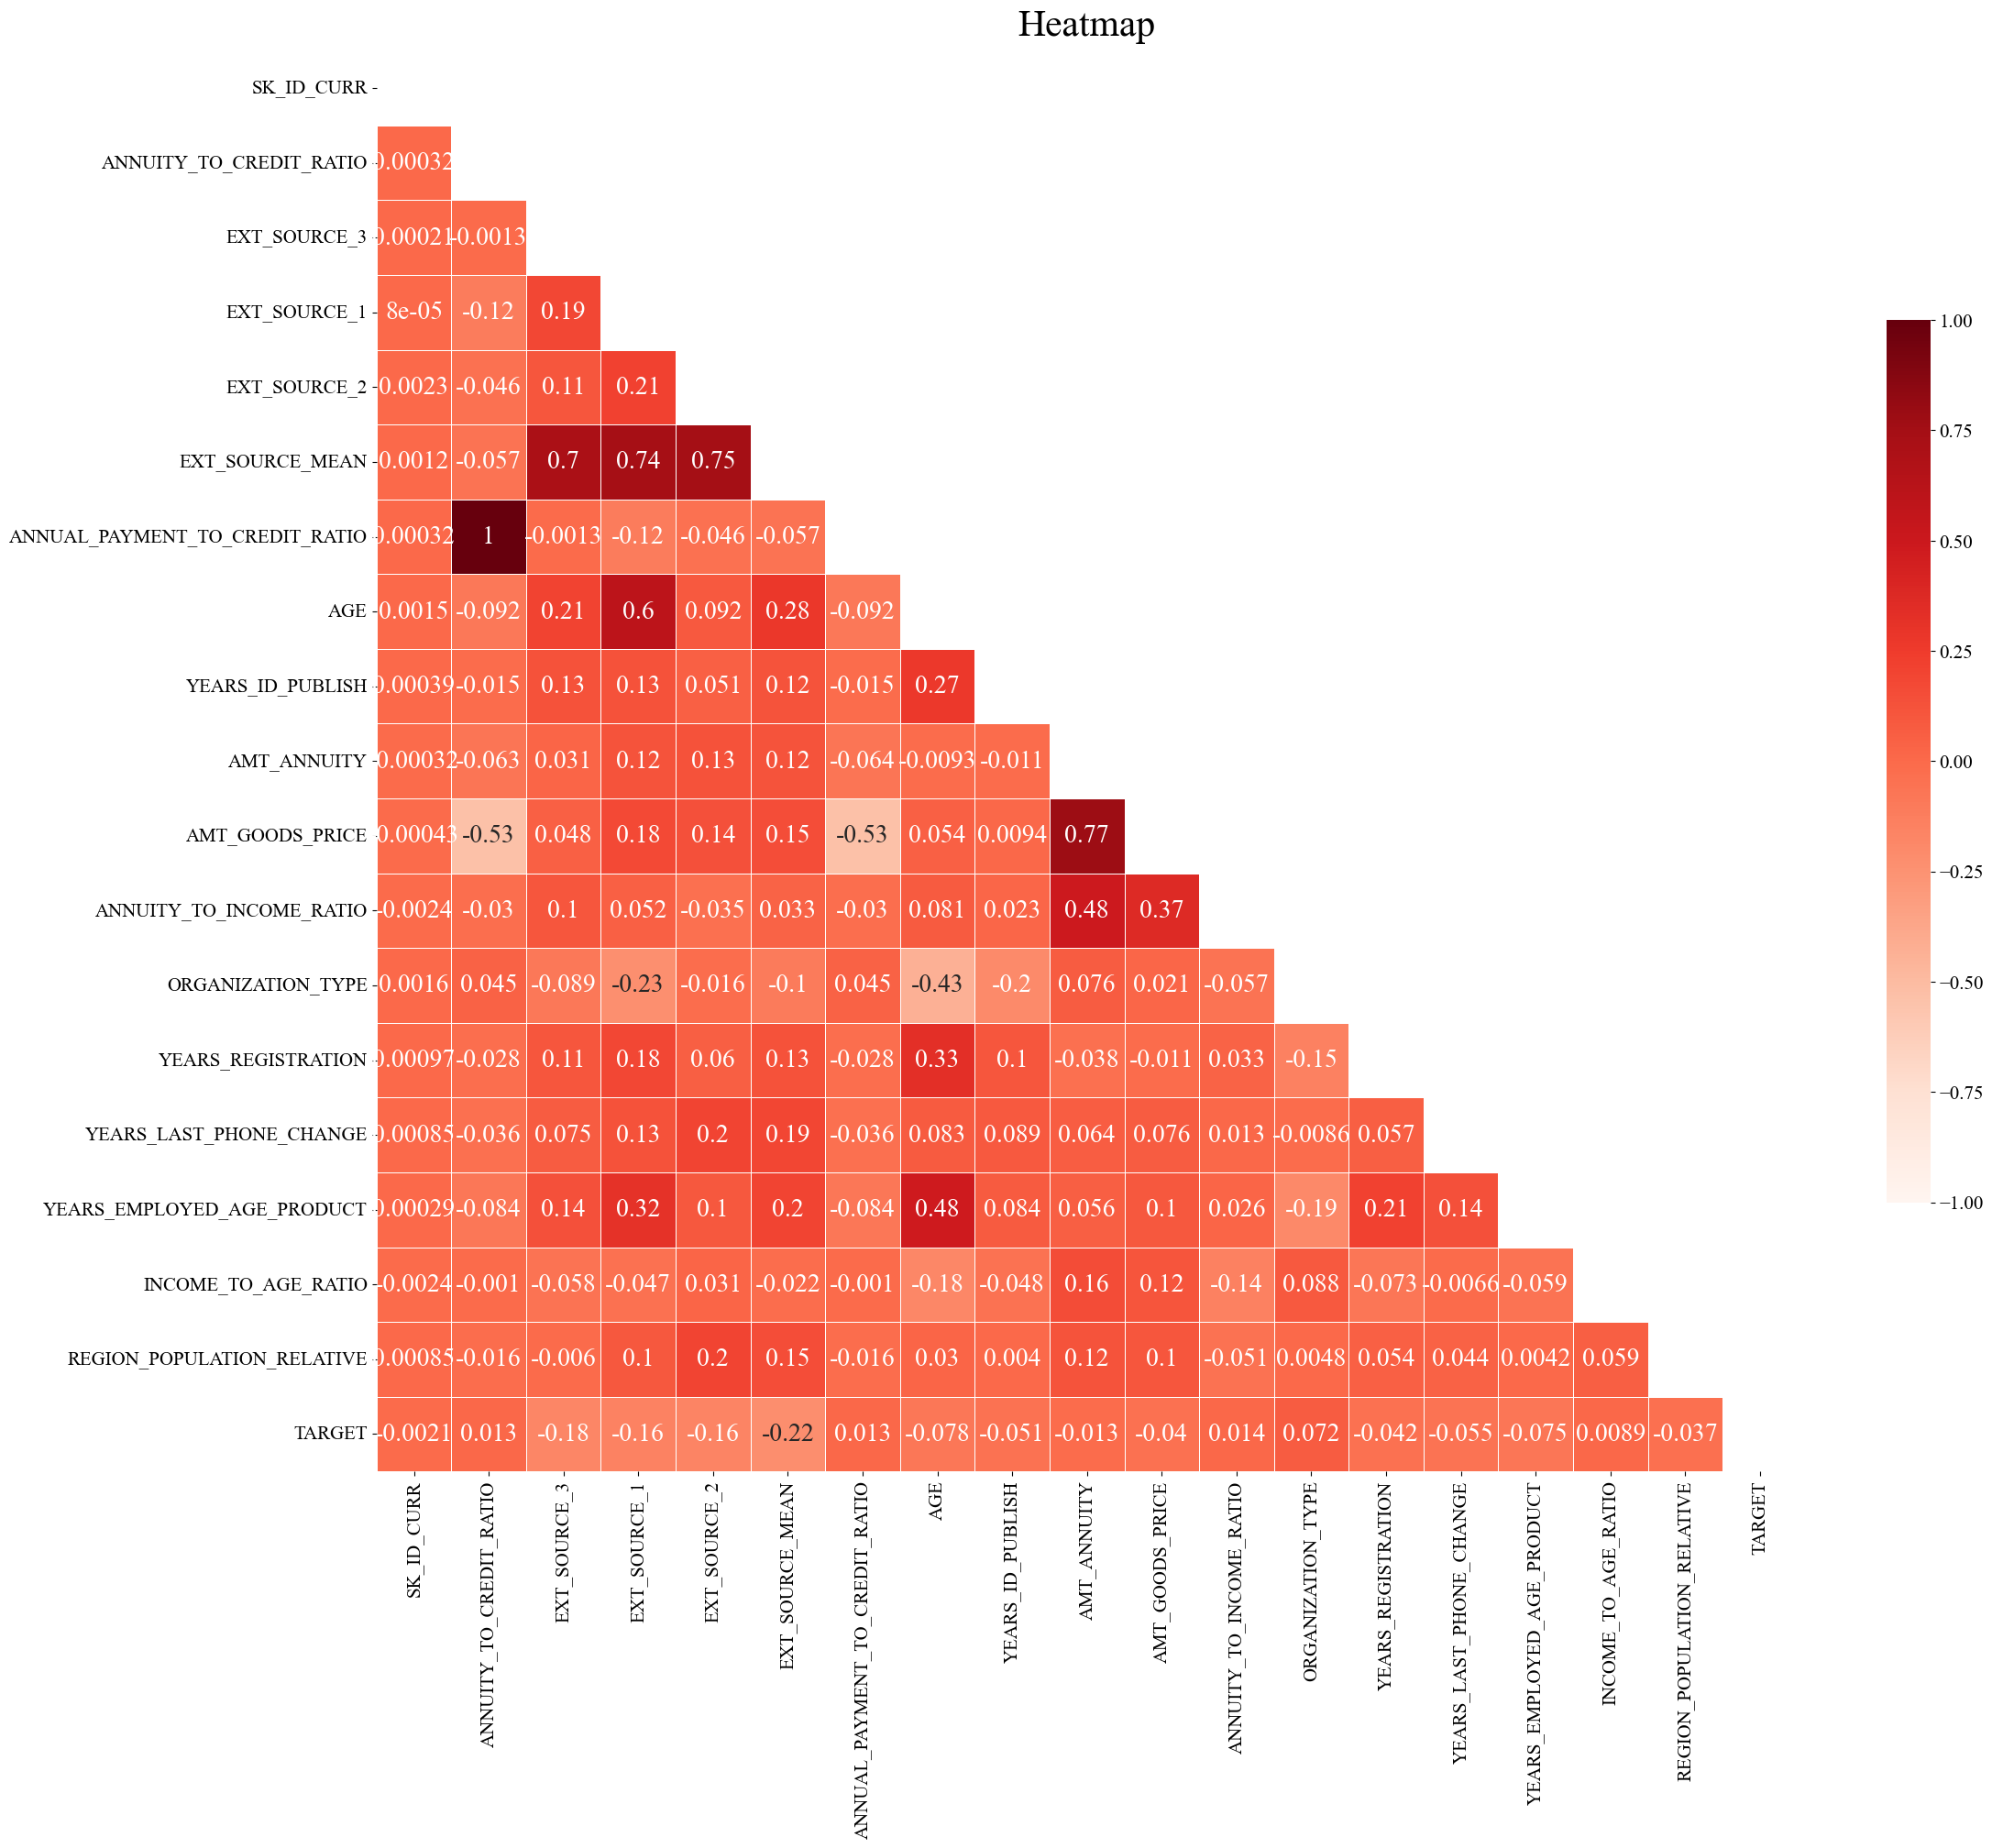

In [19]:
functions.create_heatmap(train, 'Heatmap')

# **Save Dataframe as CSV File**

In [19]:
train.to_csv(r"C:\Users\Dell\Documents\AI\Risk\Data\Data\train 23.csv", index=False)

# **Summary**

> * **Iterative Machine Learning** — I used LightGBM to iteratively reduce the number of features utilized by the model without sacrificing performance. 
> * **Reduction of Number of Features** — From 122 features, I extracted 18 without any loss in performance.
> * **Reduction of Number of Features** — My standard for colinnearity is a Pearson correlation coefficient of approximately 80%. No pair of features met this standard. Therefore, I conclude that non of the selected features are collinear.